## CARACTERÍSTICAS Y PREPROCESAMIENTO
### Autor: Víctor Barcina Muñoz

In [7]:
import pandas as pd

#carga del archivo csv de metadatos
csv_metadatos= pd.read_csv('HAM10000_metadata.csv')
#imprimir las primeras filas en modo de demostración
print(csv_metadatos.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


Como se puede comprobar, el cvs obtenido está formado por 8 columnas:
- **Lesion_id**: Id rerpresentativo de la lesión. 
- **Image_id**: Id correspondiente a la imagen. Cada una tiene su Id único.
- **Dx**:  Abreviación de la patología.
- **Dx_type**: Diagnóstico. 
- **Age**: Edad.
- **Sex**: Sexo.
- **Localozation**: Localización del cuerpo. 

In [10]:
#información general del csv
csv_metadatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


Como conclusión, obtenemos que hay 1015 imágenes diferentes. 

In [13]:
'''
Para conocer qué debemos esperar a la hora de abrir el csv, vamos a realizar un análisis profundo
del mismo, ya que contiene muchos datos.

'''
#conocer cuántas imágenes de cada enfermedad podremos encontrar, es decir, la distribución
# de cada enfermedad en los datos

distr_enf= csv_metadatos['dx'].value_counts()


# Convertirlo en un DataFrame para una mejor visualización
distr_enf_df = pd.DataFrame({'Tipo Enfermedad': distr_enf.index, 'Nº imágenes': distr_enf.values})

print(distr_enf_df)

  Tipo Enfermedad  Nº imágenes
0              nv         6705
1             mel         1113
2             bkl         1099
3             bcc          514
4           akiec          327
5            vasc          142
6              df          115


Como se puede comprobar, la BD contiene imágenes sobre 7 patologías diferentes. En el resultado aparecen ordenadas de mayor a menor: Nevus melanocítico, melanoma, queratosis seborreica, carcinoma basocelular, queratosis actínica, lesiones vasculares, y dermatofibroma

In [16]:
#la distribución de las zonas del cuerpo
distr_corp= csv_metadatos['localization'].value_counts()
# Convertirlo en un DataFrame 
distr_corp_df = pd.DataFrame({'Localización': distr_corp.index, 'Nº imágenes': distr_corp.values})

print(distr_corp_df)

       Localización  Nº imágenes
0              back         2192
1   lower extremity         2077
2             trunk         1404
3   upper extremity         1118
4           abdomen         1022
5              face          745
6             chest          407
7              foot          319
8           unknown          234
9              neck          168
10            scalp          128
11             hand           90
12              ear           56
13          genital           48
14            acral            7


Como se puede comprobar, la parte del cuerpo donde más imágenes aparecen es la espalda, extremidades inferiores y superiores y tronco. Sin embargo, aquellas zonas donde hay menos imágenes son: genitales, orejas, mano y áreas distales del cuerpo (acral).

Esto puede ser estadísticamente significativo, debido a que la mayor parte de enfermedades cutáneas aparece en tronco y espalda 

In [22]:
#distribución por sexo
distr_sex= csv_metadatos['sex'].value_counts()
# Convertirlo en un DataFrame 
distr_sex_df = pd.DataFrame({'Género': distr_sex.index, 'Nº imágenes': distr_sex.values})

print(distr_sex_df)

    Género  Nº imágenes
0     male         5406
1   female         4552
2  unknown           57


Se obtienen 5406 imágenes de hombres, mientras que de mujeres 4552. 57 imágenes no contienen género documentado. 

In [25]:
#distribucion por edad
distr_edad= csv_metadatos['age'].value_counts()

# Convertirlo en un DataFrame 
distr_edad_df = pd.DataFrame({'Edad': distr_edad.index, 'Nº imágenes': distr_edad.values})

print(distr_edad_df)

    Edad  Nº imágenes
0   45.0         1299
1   50.0         1187
2   55.0         1009
3   40.0          985
4   60.0          803
5   70.0          756
6   35.0          753
7   65.0          731
8   75.0          618
9   30.0          464
10  80.0          404
11  85.0          290
12  25.0          247
13  20.0          169
14   5.0           86
15  15.0           77
16  10.0           41
17   0.0           39


En esta parte se ha realizado una distribución por edad. Se puede comprobar que hay mayor cantidad de imágenes en las edades de 45, 50 y 55 años. Sin embargo, las edades con menos imágenes son 0, 10, 15 y 5. 

Estas estadísticas pueden ser representativas debido a que la edad es un factor de riesgo de las enfermedades cutáneas. Además, se considera que a partir de los 50 años se tiene más riesgo. 

In [28]:
'''
Conocer cuántas imágenes por cada enfermedad hay en cada género
'''
hombres = csv_metadatos[csv_metadatos['sex'] == 'male']
mujeres = csv_metadatos[csv_metadatos['sex'] == 'female']
# Contar enfermedades más comunes para hombres
enfermedades_hombres = hombres['dx'].value_counts()
enfermedades_hombres_df = pd.DataFrame({'Enfermedad': enfermedades_hombres.index, 'Nº imágenes': enfermedades_hombres.values})
print("Enfermedades más comunes en hombres:")
print(enfermedades_hombres_df)
# Contar enfermedades más comunes para mujeres
enfermedades_mujeres = mujeres['dx'].value_counts()
enfermedades_mujeres_df = pd.DataFrame({'Enfermedad': enfermedades_mujeres.index, 'Nº imágenes': enfermedades_mujeres.values})
print("\nEnfermedades más comunes en mujeres:")
print(enfermedades_mujeres_df)


Enfermedades más comunes en hombres:
  Enfermedad  Nº imágenes
0         nv         3421
1        mel          689
2        bkl          626
3        bcc          317
4      akiec          221
5       vasc           69
6         df           63

Enfermedades más comunes en mujeres:
  Enfermedad  Nº imágenes
0         nv         3237
1        bkl          463
2        mel          424
3        bcc          197
4      akiec          106
5       vasc           73
6         df           52


En este caso se ha realizado una distribución de enfermedad por sexo. No se considera que esto sea representativo debido a que depende en gran medida de la cantidad de imágenes que contenga la BD por enfermedad

C:\Users\victo\AppData\Local\Temp\ipykernel_9716\3529055576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Enfermedad', y='Nº imágenes', data=enfermedades_hombres_df, palette='Blues_d')


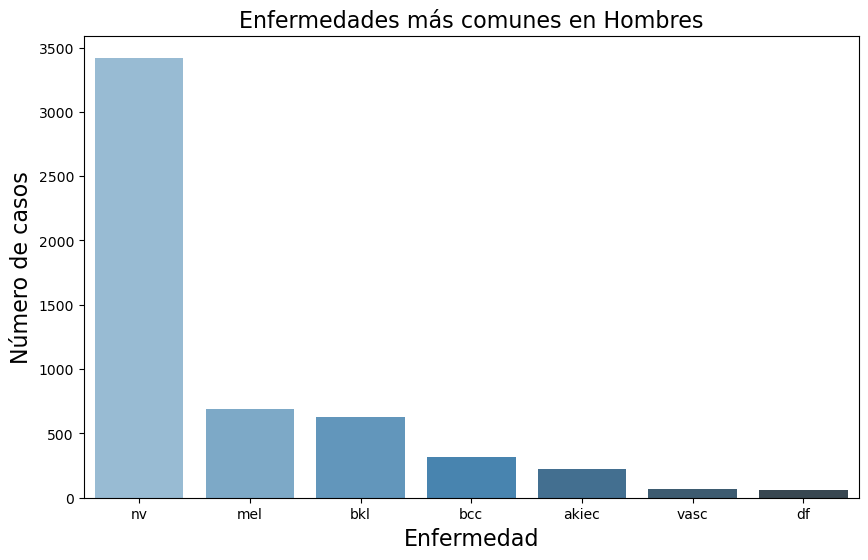

C:\Users\victo\AppData\Local\Temp\ipykernel_9716\3529055576.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Enfermedad', y='Nº imágenes', data=enfermedades_mujeres_df, palette='Oranges_d')


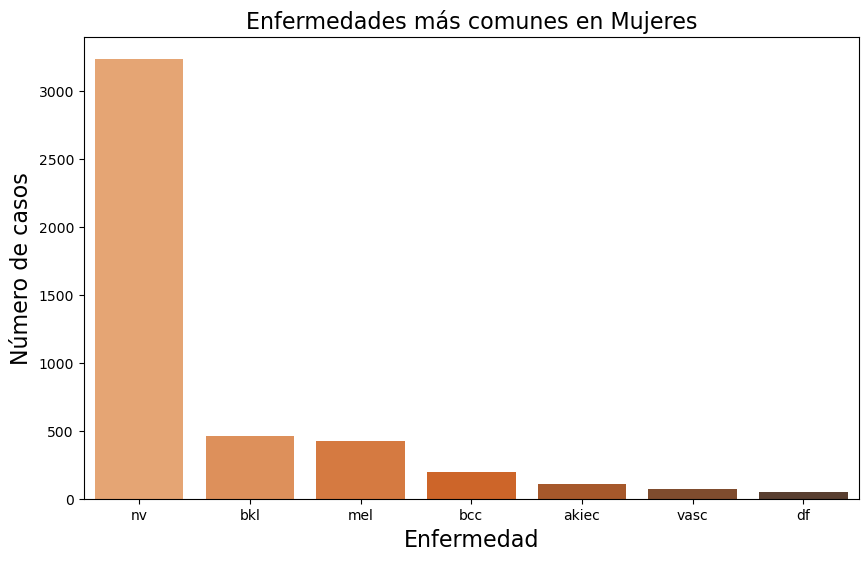

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


# Gráfica de barras para hombres
plt.figure(figsize=(10, 6))
sns.barplot(x='Enfermedad', y='Nº imágenes', data=enfermedades_hombres_df, palette='Blues_d')
plt.title('Enfermedades más comunes en Hombres', fontsize=16)
plt.xlabel('Enfermedad', fontsize=16)
plt.ylabel('Número de casos', fontsize=16)
plt.show()

# Gráfica de barras para mujeres
plt.figure(figsize=(10, 6))
sns.barplot(x='Enfermedad', y='Nº imágenes', data=enfermedades_mujeres_df, palette='Oranges_d')
plt.title('Enfermedades más comunes en Mujeres', fontsize=16)
plt.xlabel('Enfermedad', fontsize=16)
plt.ylabel('Número de casos', fontsize=16)
plt.show()

Equivale al apartado anterior. Gráficas de enfermedades por hombres y mujeres

In [36]:
#distribución de imágenes por edad y enfermedad
enfermedades_por_edad = csv_metadatos.groupby(['age', 'dx']).size().reset_index(name='count')
print(enfermedades_por_edad)

      age    dx  count
0     0.0   bkl      5
1     0.0    nv     30
2     0.0  vasc      4
3     5.0   bkl      1
4     5.0   mel      1
..    ...   ...    ...
97   85.0   bcc     52
98   85.0   bkl     93
99   85.0   mel     76
100  85.0    nv     39
101  85.0  vasc      5

[102 rows x 3 columns]


En este caso se representa cuántas imágenes hay por cada edad y enfermedad. 

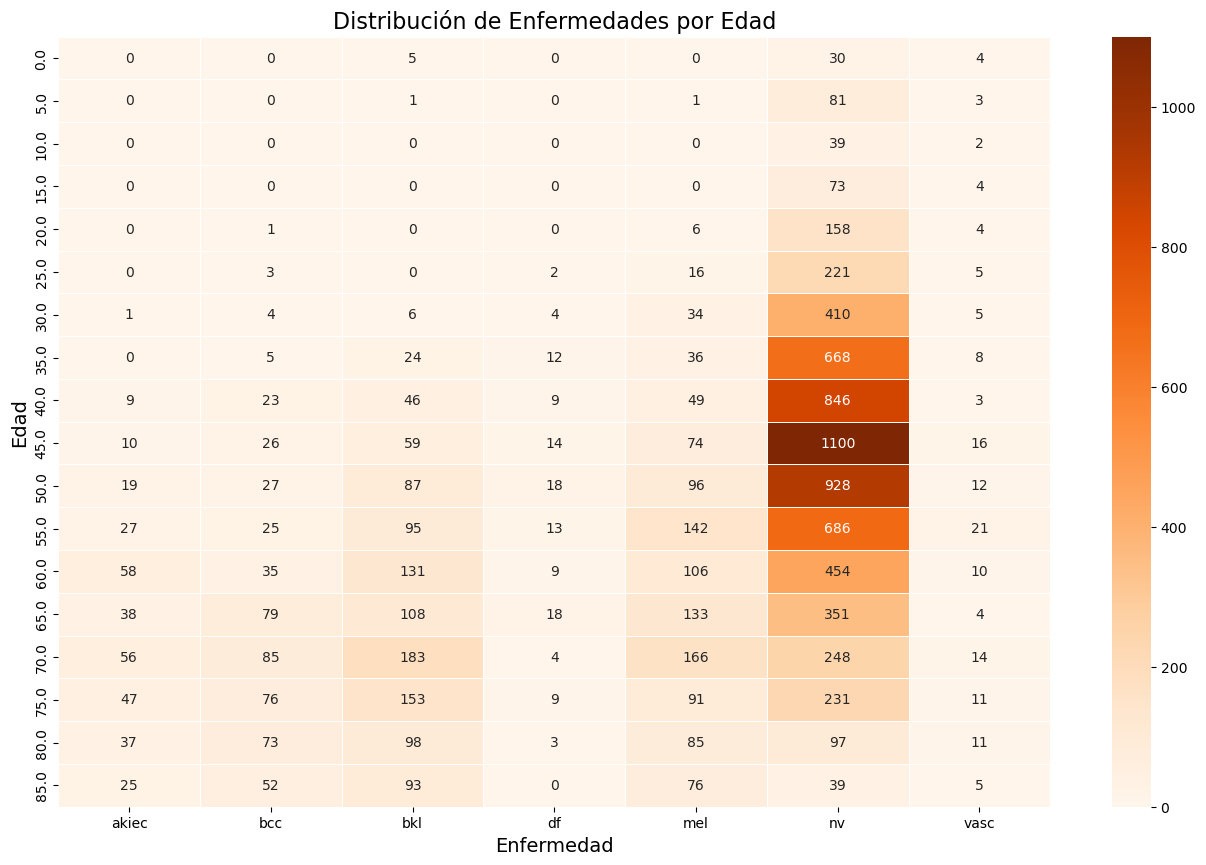

In [41]:
# Crear una tabla pivote para preparar los datos para el gráfico heatmap
pivot_enfermedades = enfermedades_por_edad.pivot(index='age', columns='dx', values='count').fillna(0)

# Graficamos
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_enfermedades, cmap='Oranges', annot=True, fmt='.0f', linewidths=.5)
plt.title('Distribución de Enfermedades por Edad', fontsize=16)
plt.xlabel('Enfermedad', fontsize=14)
plt.ylabel('Edad', fontsize=14)
plt.show()

Este apartado es equivalente al anterior. Se trata de un mapa de calor. Como era de esperar, la mayor cantidad de imágenes corresponde a Nv.

### Estructuración de las imágenes en carpetas. 

Para poder realizar el entrenamiento, es necesario realizar una estructuración de las imágenes en carpetas.
En primer lugar, se han creado 3 carpetas: 

- **Train**: Contiene 7 subcarpetas, cada una con imágenes de la enfermedad correspondiente. 
- **Val**: Contiene 7 subcarpetas, cada una con imágenes de la enfermedad correspondiente.
- **Test**:  Contiene 7 subcarpetas, cada una con imágenes de la enfermedad correspondiente.

La totalidad de las imágenes de part_1_dir y part_2_dir, se han dividido, como se ha comentado, por enfermedades. Además, se ha realizado una división de modo que se emplee el 70% de cada una para el entrenamiento, 15% para validación y el 15% restante para test. 

In [11]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Ruta a las carpetas donde están las imágenes
part_1_dir = 'HAM10000_images_part_1'
part_2_dir = 'HAM10000_images_part_2'

# Ruta al CSV que contiene la información de las imágenes y las clases
csv_path = 'HAM10000_metadata.csv'

# Directorio base para guardar las imágenes organizadas
base_dir = os.getcwd()

# Crear carpetas si no existen
def crear_carpeta_si_no_existe(carpeta):
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)

# Función para copiar imágenes a su respectiva carpeta
def copiar_imagen(origen, destino):
    if not os.path.exists(origen):
        print(f"Advertencia: La imagen {origen} no existe.")
        return
    try:
        shutil.copy(origen, destino)
    except Exception as e:
        print(f"Error al copiar {origen} a {destino}: {str(e)}")

# Leer el CSV
df = pd.read_csv(csv_path)

# Definir las clases de enfermedades
clases = df['dx'].unique()

# Crear las carpetas para train, val y test en cada clase
for conjunto in ['train', 'val', 'test']:
    for clase in clases:
        crear_carpeta_si_no_existe(os.path.join(base_dir, conjunto, clase))

# Porcentaje de división de datos (70% train, 15% val, 15% test)
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Dividir las imágenes en train, val y test por clase
for clase in clases:
    # Filtrar imágenes de la clase actual
    df_clase = df[df['dx'] == clase]
    
    # Lista de imágenes de esta clase
    imagenes = df_clase['image_id'].tolist()

    # Dividir en train, val y test
    train_imgs, test_imgs = train_test_split(imagenes, test_size=(val_ratio + test_ratio))
    val_imgs, test_imgs = train_test_split(test_imgs, test_size=test_ratio / (val_ratio + test_ratio))
    
    # Copiar imágenes a las carpetas correspondientes
    for img in train_imgs:
        origen = os.path.join(part_1_dir, f'{img}.jpg') if os.path.exists(os.path.join(part_1_dir, f'{img}.jpg')) else os.path.join(part_2_dir, f'{img}.jpg')
        destino = os.path.join(base_dir, 'train', clase, f'{img}.jpg')
        copiar_imagen(origen, destino)

    for img in val_imgs:
        origen = os.path.join(part_1_dir, f'{img}.jpg') if os.path.exists(os.path.join(part_1_dir, f'{img}.jpg')) else os.path.join(part_2_dir, f'{img}.jpg')
        destino = os.path.join(base_dir, 'val', clase, f'{img}.jpg')
        copiar_imagen(origen, destino)

    for img in test_imgs:
        origen = os.path.join(part_1_dir, f'{img}.jpg') if os.path.exists(os.path.join(part_1_dir, f'{img}.jpg')) else os.path.join(part_2_dir, f'{img}.jpg')
        destino = os.path.join(base_dir, 'test', clase, f'{img}.jpg')
        copiar_imagen(origen, destino)

print("Imágenes organizadas correctamente en las carpetas de train, val y test.")


Imágenes organizadas correctamente en las carpetas de train, val y test.


Imagen ISIC_0025479 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027980 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0024451 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029901 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028638 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029989 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027430 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0024817 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0031425 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0028149 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030431 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029813 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0026757 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027587 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0025426 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028704 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0032506 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030503 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0026584 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028110 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0034110 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0025160 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033389 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0031904 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0025239 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0034234 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033308 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0033228 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0032744 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033033 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033390 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033836 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033585 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033319 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029393 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029306 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0030251 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0032144 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030598 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030740 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0026600 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028205 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030772 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029479 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0032278 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0027896 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0030827 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0031940 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0029582 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0026729 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0028372 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0027506 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0026625 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0028854 ya existe en C:\Users\victo\OneDrive\Escrito

Imagen ISIC_0024446 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bkl, no se mueve.
Imagen ISIC_0031287 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bkl, no se mueve.
Imagen ISIC_0032365 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bkl, no se mueve.
Imagen ISIC_0026139 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bkl, no se mueve.
Imagen ISIC_0027967 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bkl, no se mueve.
Imagen ISIC_0024338 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bkl, no se mueve.
Imagen ISIC_0030935 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bkl, no se mueve.
Imagen ISIC_0029213 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bkl, no se mueve.
Imagen ISIC_0032040 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\I

Imagen ISIC_0033216 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\mel, no se mueve.
Imagen ISIC_0033154 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\mel, no se mueve.
Imagen ISIC_0033192 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\mel, no se mueve.
Imagen ISIC_0027100 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\mel, no se mueve.
Imagen ISIC_0034222 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\mel, no se mueve.
Imagen ISIC_0032569 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\mel, no se mueve.
Imagen ISIC_0034064 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\mel, no se mueve.
Imagen ISIC_0033902 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\mel, no se mueve.
Imagen ISIC_0032774 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\I

Imagen ISIC_0025932 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bcc, no se mueve.
Imagen ISIC_0028747 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bcc, no se mueve.
Imagen ISIC_0030446 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bcc, no se mueve.
Imagen ISIC_0031527 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bcc, no se mueve.
Imagen ISIC_0031166 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bcc, no se mueve.
Imagen ISIC_0028693 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bcc, no se mueve.
Imagen ISIC_0030893 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bcc, no se mueve.
Imagen ISIC_0030261 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\bcc, no se mueve.
Imagen ISIC_0028994 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\I

Imagen ISIC_0025041 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027763 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0026700 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0031174 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0031319 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028025 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027572 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027212 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030376 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0028143 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027214 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0025997 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0025844 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028422 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030450 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028612 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028695 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0031969 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0030392 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029228 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0025821 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029237 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028274 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027449 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0025886 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028269 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0031075 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0028838 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0024606 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029245 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0031912 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030946 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0031722 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028028 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028038 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028421 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0025912 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028031 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0025191 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027986 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029069 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0024655 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028334 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030020 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027952 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0030473 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0025907 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027113 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030859 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030350 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0024831 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0026869 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0026186 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0025156 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0033128 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033115 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0032625 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033867 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033202 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0032794 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0032801 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0032974 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0033746 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0026126 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028271 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0026305 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028454 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030852 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030652 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0031204 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030179 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029215 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0024447 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0024998 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0029749 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0030922 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0026671 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0024933 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0031192 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0027498 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\nv, no se mueve.
Imagen ISIC_0028128 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\

Imagen ISIC_0031659 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0024946 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0030707 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0031211 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0028872 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0030953 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0025196 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0030821 ya existe en C:\Users\victo\OneDrive\Escritorio\MASTER\TFM\Imágenes\HAM10000\akiec, no se mueve.
Imagen ISIC_0031292 ya existe en C:\Users\victo\OneDrive\Escrito